In [1]:
import scanpy as sc
import bbtnn

In [2]:
adata = sc.read("/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/data/embl_all_merged.h5ad")

In [3]:
#sc.pp.subsample(adata, n_obs = 10000)

In [4]:
from bbtnn.tnn_v3 import *

In [5]:
%%time
model = TNN(k = 20, batch_size = 32, n_epochs_without_progress = 3, verbose = 2, save_on_disk = False)
model.fit(X = adata, batch_name = "batch", Y = None)
embedding = model.transform(X = adata)

Calculating MNNs...
Processing datasets (0, 1)
Processing datasets (1, 2)
Processing datasets (2, 3)
Processing datasets (3, 4)
Processing datasets (4, 5)
Processing datasets (5, 6)
Processing datasets (6, 7)
Processing datasets (7, 8)
Processing datasets (8, 9)
Processing datasets (9, 10)
Processing datasets (10, 11)
Processing datasets (11, 12)
Processing datasets (12, 13)
Processing datasets (13, 14)
Processing datasets (14, 15)
Processing datasets (15, 16)
Processing datasets (16, 17)
Processing datasets (17, 18)
Processing datasets (18, 19)
Processing datasets (19, 20)
Processing datasets (20, 21)
Processing datasets (21, 22)
Processing datasets (22, 23)
Processing datasets (23, 24)
101766 cells defined as MNNs
Calculating KNNs
76324 cells defined as KNNs


W0326 18:53:10.248353 11892 deprecation.py:323] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0326 18:53:10.308194 11892 deprecation.py:506] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training neural network
Epoch 1/1000
5566/5566 - 14s - loss: 0.2236
Epoch 2/1000
5566/5566 - 14s - loss: 0.1255
Epoch 3/1000
5566/5566 - 13s - loss: 0.1115
Epoch 4/1000
5566/5566 - 13s - loss: 0.1054
Epoch 5/1000
5566/5566 - 13s - loss: 0.1014
Epoch 6/1000
5566/5566 - 13s - loss: 0.0964
Epoch 7/1000
5566/5566 - 13s - loss: 0.0962
Epoch 8/1000
5566/5566 - 13s - loss: 0.0921
Epoch 9/1000
5566/5566 - 13s - loss: 0.0924
Epoch 10/1000
5566/5566 - 13s - loss: 0.0893
Epoch 11/1000
5566/5566 - 13s - loss: 0.0912
Epoch 12/1000
5566/5566 - 13s - loss: 0.0877
Epoch 13/1000
5566/5566 - 13s - loss: 0.0880
Epoch 14/1000
5566/5566 - 13s - loss: 0.0872
Epoch 15/1000
5566/5566 - 13s - loss: 0.0866
Epoch 16/1000
5566/5566 - 13s - loss: 0.0851
Epoch 17/1000
5566/5566 - 13s - loss: 0.0857
Epoch 18/1000
5566/5566 - 13s - loss: 0.0850
Epoch 19/1000
5566/5566 - 13s - loss: 0.0849
Epoch 20/1000
5566/5566 - 13s - loss: 0.0834
Epoch 21/1000
5566/5566 - 13s - loss: 0.0853
Epoch 22/1000
5566/5566 - 13s - loss: 0.

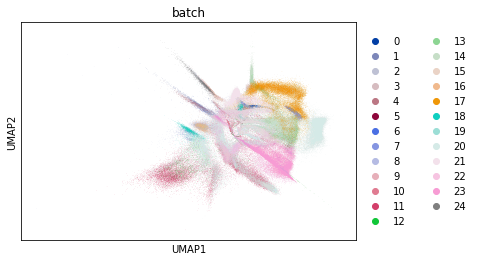

In [7]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = "batch")

In [7]:
import hdbscan

... storing 'cluster' as categorical


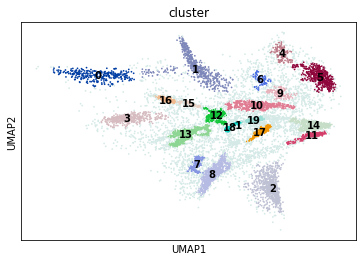

In [8]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 75, min_samples = 10, cluster_selection_epsilon=0.1)
clusterer.fit(embedding)
adata.obs["cluster"] = clusterer.labels_.astype("str")
sc.pl.umap(adata, color = "cluster", legend_loc = "on data")

In [9]:
from sklearn.cluster import KMeans

... storing 'cluster' as categorical


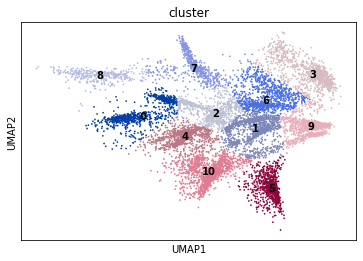

In [11]:
clusterer = KMeans(n_clusters = 11)
clusterer.fit(embedding)
adata.obs["cluster"] = clusterer.labels_.astype("str")
sc.pl.umap(adata, color = "cluster", legend_loc = "on data")

In [4]:
from bbtnn import tnn

In [10]:
subm = sc.pp.subsample(adata, n_obs = 50000, copy = True)

In [11]:
%%time
model = tnn.TNN(k = 100, batch_size = 32, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = subm, Y = None)
embedding = model.transform(X = subm)

calc mnns
[[0.00000000e+00 1.85069289e-01 1.68744687e-01 0.00000000e+00
  1.44230769e-02 2.52054406e-01 2.09691131e-02 4.10006949e-02
  1.25389629e-01 6.23714873e-02 6.29921260e-02 7.21247563e-02
  2.83500456e-01 1.31489071e-01 0.00000000e+00 6.30630631e-02
  3.20512821e-03 0.00000000e+00 5.60471976e-02 0.00000000e+00
  2.25563910e-02 0.00000000e+00 9.80392157e-02 1.35135135e-02
  7.10382514e-02]
 [0.00000000e+00 0.00000000e+00 1.48636567e-01 1.69491525e-02
  1.34615385e-02 5.04023245e-01 1.69870362e-02 6.94927033e-04
  2.64416629e-01 1.42563400e-01 9.44881890e-03 3.89863548e-03
  1.43719267e-01 1.75011176e-01 0.00000000e+00 6.08108108e-02
  4.16666667e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.25563910e-02 7.10659898e-02 5.88235294e-02 1.35135135e-02
  5.46448087e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.40801959e-02 5.47597184e-01 1.55494337e-01 1.09103544e-01
  3.27517600e-02 3.28992461e-02 1.10236220e-02 3.31384016e-02
  3.97903373e-01 1.11417

  0.00000000e+00]]
sort mnns
calc knns
17146
******Batches:[21, 23, 17, 16, 8, ..., 0, 5, 19, 4, 2]
Length: 25
Categories (25, object): [21, 23, 17, 16, ..., 5, 19, 4, 2]
******Total number of cells:50000
******Number of cells for MNN:32854
reformat
sort
Training neural network
Epoch 1/1000
1563/1563 - 5s - loss: 0.4251
Epoch 2/1000
1563/1563 - 4s - loss: 0.2322
Epoch 3/1000
1563/1563 - 4s - loss: 0.1932
Epoch 4/1000
1563/1563 - 4s - loss: 0.1708
Epoch 5/1000
1563/1563 - 4s - loss: 0.1610
Epoch 6/1000
1563/1563 - 4s - loss: 0.1485
Epoch 7/1000
1563/1563 - 4s - loss: 0.1492
Epoch 8/1000
1563/1563 - 4s - loss: 0.1411
Epoch 9/1000
1563/1563 - 4s - loss: 0.1417
Epoch 10/1000
1563/1563 - 4s - loss: 0.1397
Epoch 11/1000
1563/1563 - 4s - loss: 0.1352
Epoch 12/1000
1563/1563 - 4s - loss: 0.1360
Epoch 13/1000
1563/1563 - 4s - loss: 0.1310
Epoch 14/1000
1563/1563 - 4s - loss: 0.1308
Epoch 15/1000
1563/1563 - 4s - loss: 0.1252
Epoch 16/1000
1563/1563 - 4s - loss: 0.1229
Epoch 17/1000
1563/1563 - 

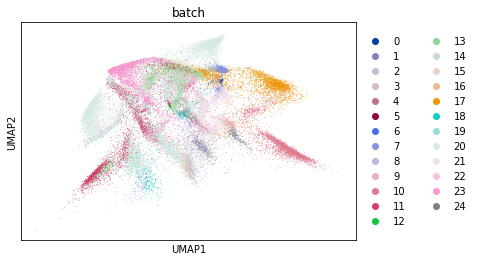

In [12]:
subm.obsm["X_umap"] = embedding
sc.pl.umap(subm, color = "batch")

In [4]:
from bbtnn.tnn import *

In [ ]:
sc.pp.subsample(adata, n_obs = 30000)

In [5]:
%%time
k = 100
batch_list = adata.obs['batch']
datasets = []
for i in batch_list.unique():
      datasets.append(adata[batch_list == i])

datasets_pcs = []
for i in batch_list.unique():
      datasets_pcs.append(adata[batch_list == i].obsm["X_pca"])
print("calc mnns")
alignments, matches = find_alignments(datasets = datasets_pcs, knn = k, prenormalized = True, approx = True)

calc mnns
[[0.00000000e+00 1.85069289e-01 1.68744687e-01 0.00000000e+00
  1.44230769e-02 2.52054406e-01 2.09691131e-02 4.10006949e-02
  1.25389629e-01 6.23714873e-02 6.29921260e-02 7.21247563e-02
  2.83500456e-01 1.31489071e-01 0.00000000e+00 6.30630631e-02
  3.20512821e-03 0.00000000e+00 5.60471976e-02 0.00000000e+00
  2.25563910e-02 0.00000000e+00 9.80392157e-02 1.35135135e-02
  7.10382514e-02]
 [0.00000000e+00 0.00000000e+00 1.48636567e-01 1.69491525e-02
  1.34615385e-02 5.04023245e-01 1.69870362e-02 6.94927033e-04
  2.64416629e-01 1.42563400e-01 9.44881890e-03 3.89863548e-03
  1.43719267e-01 1.75011176e-01 0.00000000e+00 6.08108108e-02
  4.16666667e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.25563910e-02 7.10659898e-02 5.88235294e-02 1.35135135e-02
  5.46448087e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.40801959e-02 5.47597184e-01 1.55494337e-01 1.09103544e-01
  3.27517600e-02 3.28992461e-02 1.10236220e-02 3.31384016e-02
  3.97903373e-01 1.11417

  0.00000000e+00]]
Wall time: 4min 20s


In [6]:
%%time
print("sort mnns")
dict_mnn, cells_for_mnn = create_dictionary_mnn(datasets, matches)

sort mnns
Wall time: 5.35 s


In [7]:
%%time
cells_for_knn = list(set(adata.obs_names) - set(cells_for_mnn))
print("calc knns")
dict_knn, cells_for_knn_1 = create_dictionary_knn(adata, cells_for_knn, k)


calc knns
17146
Wall time: 17.2 s


In [8]:
%%time
print ('******Batches:'+ str(batch_list.unique()))
print ('******Total number of cells:'+ str(len(adata.obs_names)))
print ('******Number of cells for MNN:'+ str(len(cells_for_mnn)))
print("reformat")
knn_frame = pd.DataFrame({'index':list(dict_knn.keys()), 'neighbor':list(dict_knn.values())})
mnn_frame = pd.DataFrame({'index':list(dict_mnn.keys()), 'neighbor':list(dict_mnn.values())})
merged_frame = mnn_frame.append(knn_frame)


******Batches:[21, 23, 17, 16, 8, ..., 0, 5, 19, 4, 2]
Length: 25
Categories (25, object): [21, 23, 17, 16, ..., 5, 19, 4, 2]
******Total number of cells:50000
******Number of cells for MNN:32854
reformat
Wall time: 165 ms


In [9]:
%%time
print("sort")
triplet_list = []
for i in adata.obs_names:
    if i in dict_mnn.keys():
        samples = dict_mnn[i]
        samples_indices = [adata.obs_names.get_loc(x) for x in samples]
        triplet_list.append(samples_indices)
    else:
        if i in dict_knn.keys():
            samples = dict_knn[i]
            samples_indices = [adata.obs_names.get_loc(x) for x in samples]
            triplet_list.append(samples_indices)

sort
Wall time: 3.22 s


In [19]:
triplet_list = []
for i in adata.obs_names:
    if i in dict_mnn.keys():
        samples = dict_mnn[i]
        samples_indices = [adata.obs_names.get_loc(x) for x in samples]
        triplet_list.append(samples_indices)

In [4]:
from bbtnn.tnn_v2 import *

In [6]:
%%time
mnn_matches = calculate_mnns(adata, batch_name = "batch", knn = 100)
mnn_neighbour_list, cells_for_mnn = convert_mnns_pairs_to_list_3(mnn_matches, cell_names = adata.obs_names)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(2, 21)
(2, 22)
(2, 23)
(2, 24)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(3, 21)
(3, 22)
(3, 23)
(3, 24)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(4, 21)
(4, 22)
(4, 23)
(4, 24)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(5, 21)
(5, 22)
(5, 23)
(5, 24)
(6, 7)


In [7]:
%%time
cells_for_knn = find_leftover_cells(adata, mnn_matches)
X = adata[adata.obs_names.isin(cells_for_knn)].obsm["X_pca"]
knn_matrix = calculate_knns(X)
knn_neighbour_list = []
for i in range(0, knn_matrix.shape[0]):
    knn_neighbour_list.append(list(knn_matrix[i,:]))

Wall time: 2.02 s


In [8]:
%%time
final_neighbour_list = mnn_neighbour_list + knn_neighbour_list
final_cells = cells_for_mnn + list(cells_for_knn)

triplet_list = []
for i in adata.obs_names:
    triplet_list.append(final_neighbour_list[final_cells.index(i)])

Wall time: 18.8 s


In [33]:
%%time
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.06, min_samples=10).fit(embedding)
adata.obs["cluster"] = clustering.labels_.astype("str")

Wall time: 18.5 s


In [23]:
adata.obs["cluster"].unique()

array(['0', '-1'], dtype=object)

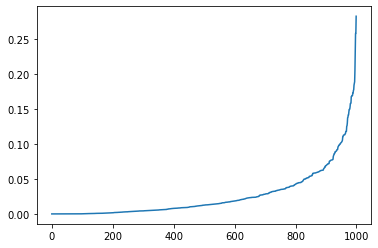

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
X = embedding[np.random.randint(0, embedding.shape[0], 1000),:]
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)